# Assignment 2
## By Samson Goodenough (190723380)
---

### Section 1 | Concept Question

#### Section 1.1 | Expression for the joint likelihood of the network in its factored form

$$P(a, b, c, d, e, f, g) = P(a)*P(b|a)*P(c|b) * P(g)*P(f|g) * P(d|c,f) * P(e|d)$$

#### Section 1.2 | Naive Bayesian Networks

$$P(K = 1|a = 1, b = 1, c = 0) = \frac{0}{1} = 0$$

$$P (K = 0|a = 1, b = 1) = \frac{1}{2} = 0.5$$

### Section 2 | Programming Question: Product Classification

#### Section 2.1 | Data Loading and Preprocessing

In [9]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
# Read the data
df = pd.read_csv(r"otto.csv")

In [11]:
# Find the number of instances and classes
num_instances = df.shape[0]
num_classes = df['target'].nunique()

print('Number of instances:', num_instances)
print('Number of classes:', num_classes)

Number of instances: 61878
Number of classes: 9


In [12]:
# Remove all NaN values
df = df.dropna()

# Remove non-numerical class labels (id)
df = df[df.id.apply(lambda x: str(x).isdigit())]

# Sum all feature values in row and filter out those with sum = 0
sums = df.iloc[:, 1:-1].sum(numeric_only = True, axis=1)
preprocessed = df[sums > 0]


In [13]:
# Split the data into features and target
features = preprocessed.drop(['target', 'id'], axis=1).columns

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(preprocessed[features], preprocessed['target'], test_size=0.2)

#### Section 2.2 | Algorithm Implementation

##### Section 2.2.1 | K-Nearest Neighbors

In [14]:
# Import the classifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Make, train, and evaluate the classifier
k_classifier = KNeighborsClassifier(n_neighbors=3)
k_classifier.fit(x_train, y_train)
pred_k_classifier = k_classifier.predict(x_test)

##### Section 2.2.2 | Random Forest

In [16]:
# Import the classifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Make, train, and evaluate the classifier
f_classifier = RandomForestClassifier(n_estimators=18, max_samples=1000, bootstrap=True, criterion='entropy')
f_classifier.fit(x_train, y_train)
pred_f_classifier = f_classifier.predict(x_test)

##### Section 2.2.3 | Naive Bayes

In [18]:
# Import the classifier
from sklearn.naive_bayes import GaussianNB

In [19]:
# Make, train, and evaluate the classifier
g_classifier = GaussianNB()
g_classifier.fit(x_train, y_train)
pred_g_classifier = g_classifier.predict(x_test)

#### Section 2.3 | Performance Comparison

In [20]:
# Imports
from sklearn.metrics import precision_recall_fscore_support

In [21]:
# find the greatest and highlight it
print("{:23}{:14}".format('', 'fscore'))

prfs = []
prfs.append(np.asarray(precision_recall_fscore_support(y_test, pred_k_classifier, average='micro')))
prfs.append(np.asarray(precision_recall_fscore_support(y_test, pred_f_classifier, average='micro')))
prfs.append(np.asarray(precision_recall_fscore_support(y_test, pred_g_classifier, average='micro')))

for i in range(len(prfs)):
    for j in range(len(prfs[i])-1):
        prfs[i][j] = round(prfs[i][j], 12)
        
for i in range(len(prfs[0])-1):
    max = [j,i]
    for j in range(len(prfs)):
        if prfs[max[0]][max[1]] < prfs[j][i]:
            max = [j, i]
    prfs[max[0]][max[1]] = '\033[2;1;43m'+str(prfs[max[0]][max[1]])+'\x1b[0m'

# print results
print("{:20} | {:0<14}".format('K-Nearest Neighbors', prfs[0][2]))
print("{:20} | {:0<14}".format('Random Forest', prfs[1][2]))
print("{:20} | {:0<14}".format('Naive Bayes', prfs[2][2]))


                       fscore        
K-Nearest Neighbors  | 0.771897220427
Random Forest        | 0.691257272140
Naive Bayes          | 0.617162249515


In [22]:
# Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing 
import seaborn as sn

<AxesSubplot:>

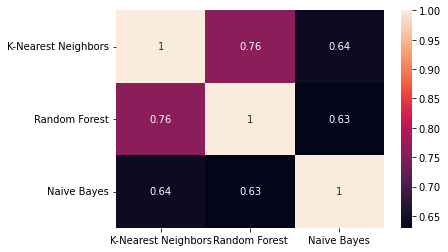

In [23]:
label = preprocessing.LabelEncoder()

# Format target labels
scores_df = pd.DataFrame({
  'K-Nearest Neighbors': label.fit_transform(pred_k_classifier),
  'Random Forest': label.fit_transform(pred_f_classifier),
  'Naive Bayes': label.fit_transform(pred_g_classifier)
})

corrMatrix = scores_df.corr()
sn.heatmap(corrMatrix, annot=True)

### Conclution
---
As displayed by the fscores, the K-Nearest Neighbors algorithm always out performs the others by about 10-15% making it the clear choice for any use of the algorithms. Upon tweaking training parameters I was able to increase Random Forest by around 2% but it will still not overcome K-Nearest Neighbors.